In [1]:
import os
import sys
import pytz
import argparse
# import jax.numpy as jnp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from geopy import distance
import datetime
import tilemapbase
from copy import deepcopy
import pickle as pkl
from PIL import Image
import skimage.measure
import math
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
os.environ['PYTHONWARNINGS']='ignore'

In [2]:
locs = pd.read_csv('/scratch/ab9738/hidden_hotspots/data/purpleair_nyc_sensor_locations.csv')

In [3]:
locs

SensorIndex   Latitude  Longitude
0        151270  40.742165 -73.996370
1         87557  40.778080 -73.914920
2         92171  40.860455 -73.885810
3        110490  40.710420 -74.084460
4        135024  40.801243 -73.970146
5        140094  40.893400 -73.837830
6        140378  40.865273 -73.907390
7        144714  40.785732 -73.973150
8        147789  40.714092 -73.934630
9        178413  40.713100 -73.950790
10       181647  40.671660 -73.981100
11       181651  40.738945 -73.977940
12       182073  40.685577 -74.000390
13       182419  40.634605 -73.949270
14       186091  40.900800 -73.966644
15       186387  40.693560 -73.941795
16       186817  40.713230 -73.978134
17       187945  40.851060 -73.834750
18       188617  40.881100 -73.914560
19       188657  40.816654 -73.947360
20       188665  40.849163 -73.931350
21       189061  40.772564 -73.951385
22       189249  40.728977 -73.997604
23       195445  40.919216 -73.906480
24       198733  40.659640 -73.953170
25       202009  40.735252 -73.957720

In [5]:
region_lat_b, region_lat_t, region_long_l, region_long_r \
= locs['Latitude'].max()+0.05, locs['Latitude'].min()-0.05, locs['Longitude'].min()-0.05, locs['Longitude'].max()+0.05

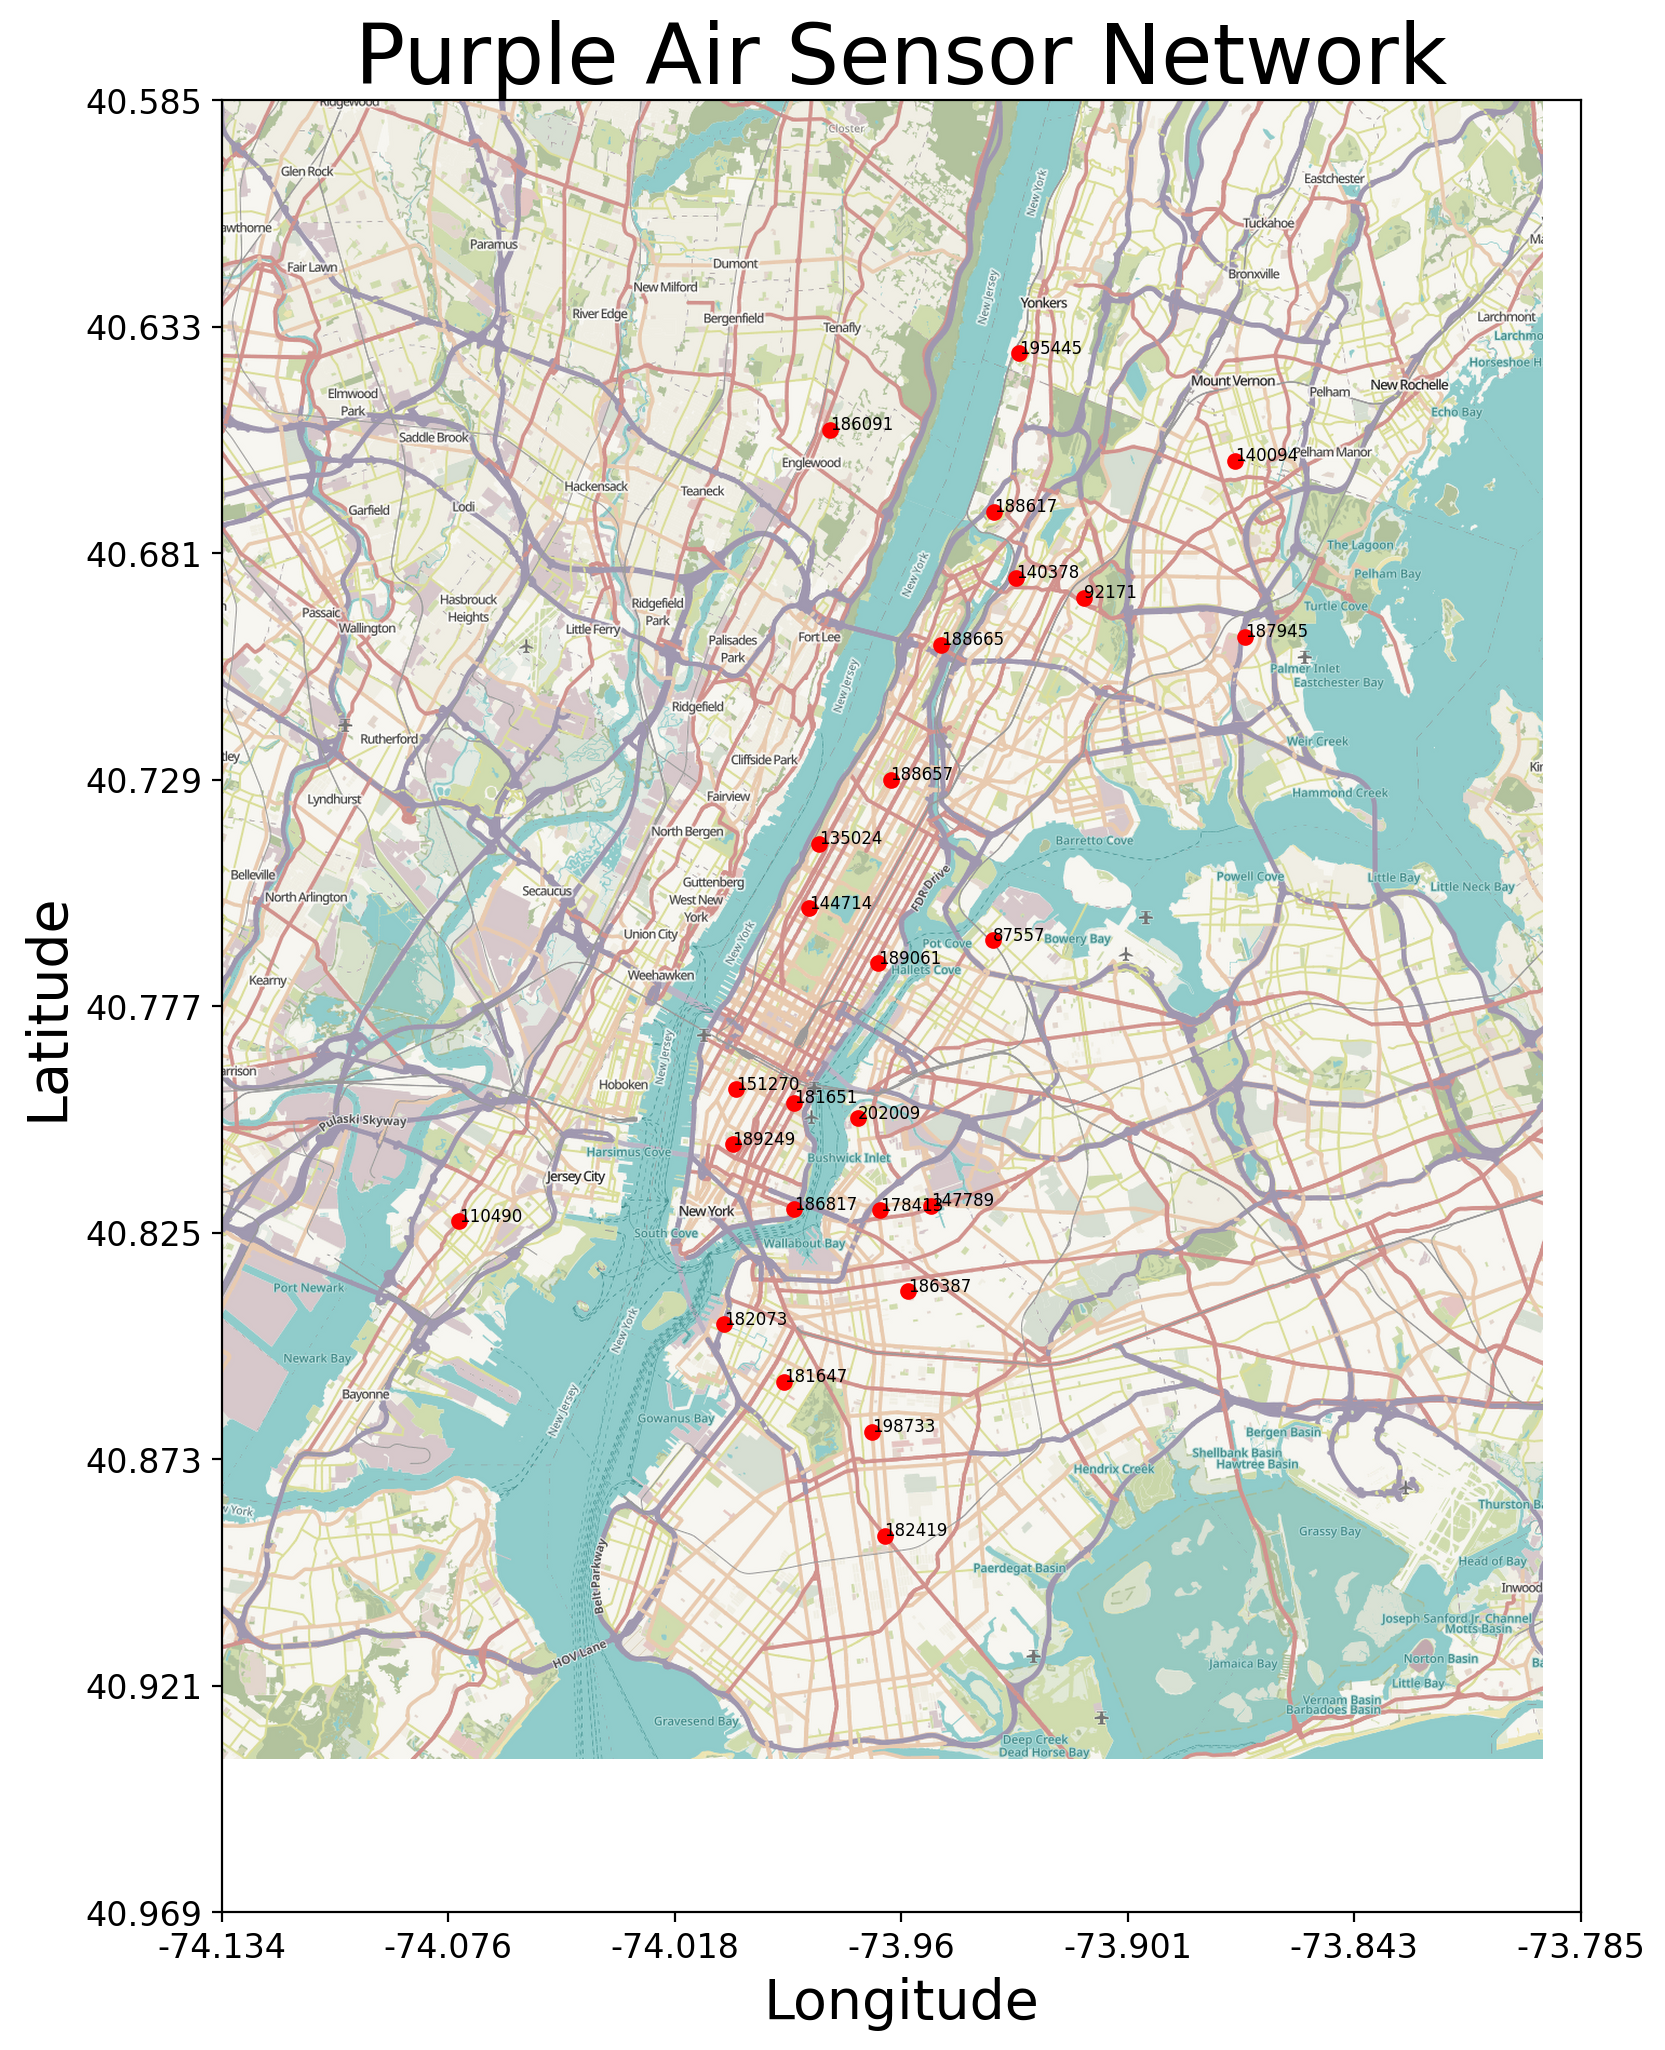

In [16]:
lat_lims = region_lat_b, region_lat_t
lon_lims = region_long_l, region_long_r
lat_center, lon_center = (region_lat_b + region_lat_t)/2, (region_long_l + region_long_r)/2

extent = tilemapbase.Extent.from_lonlat(region_long_l, region_long_r, region_lat_t, region_lat_b)
extent_proj = extent.to_project_3857

# use openstreetmap (OSM)
t = tilemapbase.tiles.build_OSM_Humanitarian()

plt.rc('font', size=12)

fig, ax = plt.subplots(figsize=(12,12), dpi=200)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

for row in locs.itertuples():
    x, y = tilemapbase.project(row.Longitude, row.Latitude)
    obj1 = ax.scatter(x, y, marker='.', color='red', s=100)
    ax.text(x, y, row.SensorIndex, fontsize=6)

plt.xticks(plt.xticks()[0],np.round(np.linspace(region_long_l,region_long_r, 7),3))
plt.yticks(plt.yticks()[0],np.round(np.linspace(region_lat_t,region_lat_b, 9),3))
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Purple Air Sensor Network', fontsize=30)
fig.savefig('map_purpleair.png',bbox_inches='tight')
plt.show()
plt.close(fig)